## Side effet analysis
In this notebook, I demonstrate how I extracted side effect related information from AskPatient'.com 
- 1. Munge dataset from AskPatients.com; survey data on patient's experience of using certain drugs
- 2. Topic extraction from side effect (for each drug & compiled list of side effects)

In [1]:
import spacy

In [2]:
spacy.load('en_core_web_sm')

In [3]:
from pathlib import Path

In [2]:
import pickle 
import os 
import sys
import pandas as pd 
import re 
import numpy as np
%load_ext autoreload
%autoreload 2
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.analys import * 
#from src.analys import *

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

### 1. Read from the dataset from AskPatients.com -> Survey on patient's experience with certain antidepressants

In [5]:
cwd = Path.cwd()

In [ ]:
external_data_fd = '../data/external'
prsocessed_data_fd = '../data/processed'

In [3]:
L = pd.read_csv("{}/Comments.txt".format((cwd/ external_data_fd).resolve()))

In [4]:
print (L.columns)

Index(['Unnamed: 0', 'Rating', 'Reason', 'Side Effects', 'Comments', 'Sex',
       'Age', 'Duration/Dossage', 'Date Added', 'Drug', 'Category'],
      dtype='object')


In [5]:
print (L.Category.unique())

['ANALGESICSNARCOTIC' 'ANTIANGINALS' 'ANTIANXIETY' 'ANTIARTHRITICS'
 'ANTIDEPRESSANTS' 'ANTIFUNGALS' 'ANTIGOUT' 'ANTIHISTAMINES'
 'ANTIHYPERTENSIVES' 'ANTIMALARIALS' 'ANTIMETABOLITES' 'ANTIMUSCARINICS'
 'ANTIPROTOZOALS' 'BETABLOCKERS' 'BISPHOSPHONATES'
 'BLOODGLUCOSEREGULATORS' 'CALCIUMCHANNELBLOCKERS' 'CALCIUMMETABOLISM'
 'CONTRACEPTIVES' 'DERMATOLOGICS' 'DIURETICS' 'HYPERLIPIDEMIA'
 'INFERTILITY' 'KERATOLYTICS' 'NSAID' 'OPHTHALMICS' 'SEDATIVESHYPNOTICS'
 'TETRACYCLINES']


In [6]:
print (L[L.Category =='ANTIDEPRESSANTS']['Drug'].unique())

['AMITRIPTYLINEHCL' 'ANAFRANIL' 'APLENZIN' 'BRINTELLIX' 'BUPROPIONHCL'
 'BUPROPIONHYDROCHLORIDE' 'CELEXA' 'CYMBALTA' 'DESIPRAMINEHCL' 'DESYREL'
 'DOXEPINHYDROCHLORIDE' 'EFFEXOR' 'EFFEXORXR' 'ELAVIL' 'EMSAM' 'ENDEP'
 'ESCITALOPRAMOXALATE' 'IMIPRAMINEHCL' 'LEXAPRO' 'LITHIUMCARBONATE'
 'LUDIOMIL' 'NARDIL' 'NORPRAMIN' 'NORTRIPTYLINEHYDROCHLORIDE' 'PAMELOR'
 'PARNATE' 'PAXIL' 'PAXILCR' 'PERPHENAZINEANDAMITRIPTYLINEHCL' 'PRISTIQ'
 'PROZAC' 'REMERON' 'REMERONSOLTAB' 'SERZONE' 'SINEQUAN' 'SURMONTIL'
 'TOFRANILDPM' 'TRAZODONEHCL' 'VENLAFAXINEHYDROCHLORIDE' 'VIIBRYD'
 'VIVACTIL' 'WELLBUTRIN' 'WELLBUTRINSR' 'WELLBUTRINXL' 'ZOLOFT' 'ZYBAN']


In [7]:
L = L[pd.notnull(L['Side Effects'])]

In [8]:
M = L[L.Category =='ANTIDEPRESSANTS'].dropna()

In [9]:
print (len(M))

1337


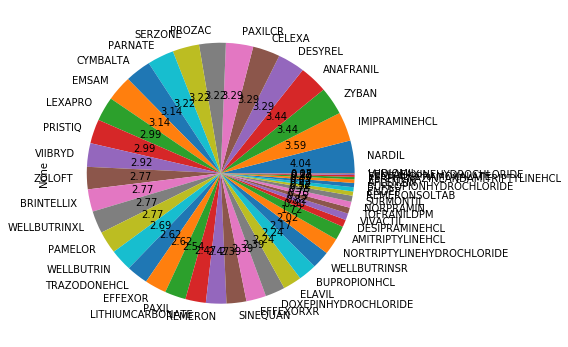

In [10]:
pd.Series(M.Drug.values).value_counts().plot.pie(autopct='%.2f', fontsize=10, figsize=(6, 6))

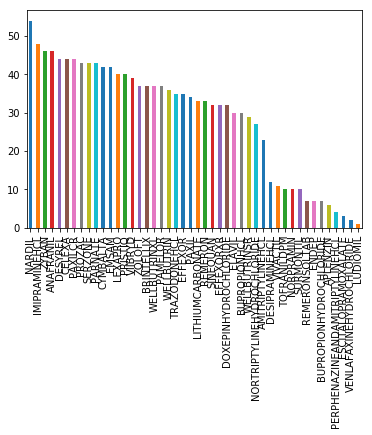

In [11]:
pd.Series(M.Drug.values).value_counts().plot.bar(fontsize=10)

#### Create dictionary of [antidepressants]: dataframe of side effects in pickle

In [12]:
# Extract brand name (better known name of the pill) from the list of antidepressants
pills = pd.read_csv('{}/antidepressants.txt'.format((cwd/ external_data_fd).resolve()))
pills['BrandName']= pills['Name'].str.split('\s+').str[0].str.strip()
# For each drug; Create corpus dataframe that contains side effects for all drugs
corp = pd.DataFrame(columns=pills.BrandName.values, index=['match_number'])
drug_name = corp.columns.values
side_effect ={}
filter_cols= ['Rating', 'Reason', 'Side Effects', 'Comments', 'Sex',
       'Age', 'Duration/Dossage', 'Drug', 'Category']

Anafranil
58
0.408221 percent out of all comments 
          Rating        Age
count  58.000000  57.000000
mean    3.724138  36.315789
std     1.411645  12.269529
min     1.000000  14.000000
25%     3.000000  30.000000
50%     4.000000  34.000000
75%     5.000000  44.000000
max     5.000000  63.000000
pth:/Users/mskang/Dropbox (MIT)/Fall 2018/InsightHD/IdeationDay3/BetterPills/pickled/comm/top5//side_effect_without_stem/Anafranil.pkl
Asendin
0
0.000000 percent out of all comments 
       Rating  Age
count     0.0  0.0
mean      NaN  NaN
std       NaN  NaN
min       NaN  NaN
25%       NaN  NaN
50%       NaN  NaN
75%       NaN  NaN
max       NaN  NaN
pth:/Users/mskang/Dropbox (MIT)/Fall 2018/InsightHD/IdeationDay3/BetterPills/pickled/comm/top5//side_effect_without_stem/Asendin.pkl
Aventyl
0
0.000000 percent out of all comments 
       Rating  Age
count     0.0  0.0
mean      NaN  NaN
std       NaN  NaN
min       NaN  NaN
25%       NaN  NaN
50%       NaN  NaN
75%       NaN  NaN
max       

117
0.823480 percent out of all comments 
           Rating         Age
count  117.000000  116.000000
mean     3.376068   38.758621
std      1.430737   11.942340
min      1.000000   16.000000
25%      2.000000   30.000000
50%      4.000000   38.500000
75%      4.000000   46.000000
max      5.000000   75.000000
pth:/Users/mskang/Dropbox (MIT)/Fall 2018/InsightHD/IdeationDay3/BetterPills/pickled/comm/top5//side_effect_without_stem/Paxil.pkl
Pexeva
0
0.000000 percent out of all comments 
       Rating  Age
count     0.0  0.0
mean      NaN  NaN
std       NaN  NaN
min       NaN  NaN
25%       NaN  NaN
50%       NaN  NaN
75%       NaN  NaN
max       NaN  NaN
pth:/Users/mskang/Dropbox (MIT)/Fall 2018/InsightHD/IdeationDay3/BetterPills/pickled/comm/top5//side_effect_without_stem/Pexeva.pkl
Prozac
60
0.422297 percent out of all comments 
          Rating        Age
count  60.000000  59.000000
mean    2.450000  27.491525
std     1.407305  10.703485
min     1.000000  13.000000
25%     1.000000  2

In [ ]:
# save ot under data/processed/side_effect_without_stem
newpath_1 = r'{}//side_effect_without_stem'.format((cwd/ processed_data_fd).resolve())
if not os.path.exists(newpath_1):
    os.makedirs(newpath_1)
for d_n in drug_name:
    print (d_n)
    find_in_df(side_effect, L, d_n, filter_cols,d_n,newpath_1,tag="save", col='Drug')

In [14]:
print(side_effect.keys())

dict_keys(['Anafranil', 'Asendin', 'Aventyl', 'Celexa', 'Cymbalta', 'Desyrel', 'Elavil', 'Effexor', 'Emsam', 'Etrafon', 'fluvoxamine', 'Lexapro', 'Cipralex', 'Limbitrol', 'Ludiomil', 'Marplan', 'Nardil', 'nefazodone', 'Norpramin', 'Pamelor', 'Parnate', 'Paxil', 'Pexeva', 'Prozac', 'Remeron', 'Sarafem', 'Seroquel', 'Sinequan', 'Surmontil', 'Symbyax', 'Tofranil', 'Tofranil-PM', 'Triavil', 'Vivactil', 'Wellbutrin', 'Zoloft', 'Zyban'])


In [ ]:
# Data structure example: prozac

In [14]:
print(side_effect['Prozac']['Side Effects'].values)

['It erased my personality.'
 'It worked for my bulimia, but after 2 years I wanted to be off it because side effects were bothering. After stopping I got withdrawal, that was hell.\r\nNow I am 6 months clean and withdrawal is starting to ease.'
 'None really. Maybe dry mouth, but just for the first few weeks of taking it.'
 'This drug ruined my life.'
 "Change of personality to worse.\r\nFluoxetine/prozac changed my personality to worse, I used to be a anxious, overthinking, worried guy. Now I don't care about anything, I am irritable and agressive with everyone and I don't like it at all.\r\nI miss myself so much that I am suicidal."
 "At first it helped with anxiety. Then I decided to come off because I just took it to help me through a bad period. 2 months after coming off, HOLY MOLY, worst anxiety of my life, much worse than before prozac. Now I am very scared because i don't want to go back on it, but this anxiety is so bad."
 'In just 4 months I completely lost myself. I went fr

In [16]:
side_effect_only= {k:pd.DataFrame(v['Side Effects'].values, columns=['Side Effects'] ) for k,v in side_effect.items()}

### 2. Topic extraction from compiled corpus of the side effect ; RAKE and TextRank
I've collected topic extracted from TextRank and saved it for each drug: 
1. data/processed/side_effect_without_stem/SE_topic_" + d_name.pkl --> save the output from both RAKE and TextRank into pickle file
2. data/processed/side_effect_without_stem/all_SE.txt" --> Compiled list of all unique side effects

RAKE:  
TextRank:  

In [30]:
# Try three methods 
# RAKE 
# TF-IDF
# TextRank - Graphical model 
# Trying these three things 
#3: RAKE keywords for each page
import RAKE
# import tfidf
import textrank
from summa import keywords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

def get_stem_lemma2(word):
    # Choosing Porter over Lancaster, for their completeness
    # lemmatize words
    return WordNetLemmatizer().lemmatize(word)

def topic_models(df, col): 
    # 1. RAKE  - What does the score mean? How do you validate? 
    df_result =pd.DataFrame(columns=['agg_rake','agg_TextRank','agg_hLDA'],dtype=object)
    rake = RAKE.Rake(RAKE.NLTKStopList())
    all_sf=[]
    df["rake_result"] = [[]]* len(df)
    df["textRank_result"]= [[]]* len(df)
    for ind,pg in zip(df[col].index,df[col].values):
        df.at[ind, "rake_result"]= [rake.run(pg,minCharacters=2,  maxWords=2, minFrequency = 1)]
        all_sf.extend([pg])
    df_result['agg_rake'] = [rake.run(" ".join(all_sf),minCharacters=2,  maxWords=2, minFrequency = 1)]
    
     # 2. TextRank - Graphical method, How do you validate? 
    for ind,pg in zip(df[col].index, df[col].values):
        df.at[ind, "textRank_result"]=  keywords.keywords(pg)
    textrank_results = keywords.keywords(" ".join(all_sf))
    results =  list(set([get_stem_lemma2(word) for word in textrank_results.split()]))
    df_result['agg_TextRank'] = [results]
    return df_result


effectitvely


In [21]:
side_effect_topic_model= {}
for drug_name, df in side_effect_only.items():
#     print(drug_name)
    df_new = topic_models(df,'Side Effects')
    side_effect_topic_model[drug_name] = df_new

In [22]:
for drug_name, df in side_effect_topic_model.items():
    if len(df) >0:
        agg_rake_text_rank =[]
        df['agg_all'] = [[]]*len(df)
#         print(drug_name)
#         print ("top 10% keywords ")
#         print("rake:") 
        agg_rake_keywords= [k for (k,v)  in df['agg_rake'].values[0][:]]
#         print ("top 10 keywords ")
#         print("Topic RANK:")
#         print(df['agg_TextRank'].values[0])  
        # EDA is needed here
        agg_rake_text_rank.extend(df['agg_TextRank'].values[0])
        agg_rake_text_rank.extend(agg_rake_keywords[0:round(len(agg_rake_keywords)/2.0)])
        df['agg_all']=  [agg_rake_text_rank]
print (side_effect_topic_model['Anafranil']['agg_all'].values[0])

['dizziness', 'headed', 'pressure', 'depression', 'tremor', 'zero', 'thought', 'feel', 'sleeping', 'constipation', 'reduced', 'focus', 'fatigue', 'working', 'agitation', 'stop', 'abdominal', 'sweat', 'dry', 'sleepiness', 'insomnia', 'increased', 'depressant', 'hot', 'good', 'loss', 'burn', 'shortness', 'away', 'shaking', 'worked', 'like', 'orgasmic', 'mouth', 'weight', 'gain', 'burning', 'anxiety', 'half', 'sleepy', 'sleep', 'head', 'increase', 'painful', 'reflux', 'acid', 'feeling', 'extremely', 'extremity', 'severe', 'effective', 'effect', 'urination', 'confusion', 'nausea', 'extreme', 'life', 'heart', 'stopped', 'sweating', 'lactulose', 'erection', 'sex', 'short', 'orgasm', 'urinating', 'sedation', 'pain', 'difficulty', 'chest pain/pressure', 'zombie-like state', 'zombie-like', 'hypo-salivation', 'nil except', 'days palpitations', 'minor somnolence', 'became pregnant', 'psychiatrist told', 'safe enough', 'anti-depressants', 'month ago', 'small dose', 'intrusive thoughts', 'almost go

#### Pickle side effect topics for each drugs in pkl file under data/processed/side_effect_without_stem/SE_topic_[drugname].pkl

In [23]:
topic_all= []
topic_all_TR_only = []
for d_name, df in side_effect_topic_model.items():
    topic_all.extend(side_effect_topic_model[d_name]['agg_all'].values[0])
    topic_all_TR_only.extend(df['agg_TextRank'].values[0])
    nm = "SE_topic_" + d_name
    df.to_pickle(newpath_1 + "/%s.pkl" % (nm))
topic_all = list(set(topic_all))
topic_all_TR_only = list(set(topic_all_TR_only))

#Pickle side effect topics for each drugs in pkl file under data/processed/SE_topic_drugname
nm = newpath_1 + "/all_SE.txt"
with open(nm, "wb") as fout:
    pickle.dump(topic_all_TR_only, fout)

4430
704
